In [2]:
import re
import random
from collections import defaultdict, Counter

# Load and clean the full text of Romeo and Juliet
def load_and_clean_text(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-alphabet chars
    words = text.split()
    return words

# Build unigram and bigram counts from word list
def build_vocab_and_counts(words):
    unigram_counts = Counter(words)
    bigram_counts = defaultdict(Counter)
    for i in range(len(words) - 1):
        bigram_counts[words[i]][words[i + 1]] += 1
    total_words = sum(unigram_counts.values())
    return unigram_counts, bigram_counts, total_words

# Calculate unigram probability
def unigram_prob(word, unigram_counts, total_words):
    return unigram_counts[word] / total_words if word in unigram_counts else 0

# Calculate bigram probability
def bigram_prob(w1, w2, bigram_counts, unigram_counts):
    if w1 in bigram_counts and w2 in bigram_counts[w1]:
        return bigram_counts[w1][w2] / unigram_counts[w1]
    return 0

# Generate sentence using bigram probabilities and stochastic sampling
def generate_sentence(start_word, length, unigram_counts, bigram_counts):
    sentence = [start_word]
    current_word = start_word
    for _ in range(length - 1):
        if current_word not in bigram_counts or len(bigram_counts[current_word]) == 0:
            break
        next_words = bigram_counts[current_word]
        total = sum(next_words.values())
        words = list(next_words.keys())
        probs = [count / total for count in next_words.values()]
        current_word = random.choices(words, weights=probs)[0]
        sentence.append(current_word)
    return ' '.join(sentence)

# Main execution
if __name__ == "__main__":
    filename = "/Users/madalanagasekhar/Downloads/Romeo_and_Juliet.txt"  # make sure this file is in the working directory
    words = load_and_clean_text(filename)
    unigram_counts, bigram_counts, total_words = build_vocab_and_counts(words)

    start_words = ["romeo", "juliet", "love", "important"]
    for start in start_words:
        print(f"Generated sentence starting with '{start}':")
        sent = generate_sentence(start, 100, unigram_counts, bigram_counts)
        print(sent)
        print()


Generated sentence starting with 'romeo':
romeo tis since the cause ah me first watchman sovereign here in laura to mercutio and she bid me from thy death but riddling shrift with his nets but where shall romeos name i fear too sudden mean to part deprived of death was mine being the cook that most lamentable chance the ground i wake her head as they saw it grows very like such a word romeo advances alack my soul is in our heads of ours with baleful weeds and waddled all dissemblers ah me peruse this torture hell itself o it sight do you the third

Generated sentence starting with 'juliet':
juliet madam sweetheart why then weep the commission of our marriage to see queen mab with that i with that killd my lady capulet how my soninlaw death and nurse within it not deny what with his roe like a very night awhile stand up that cannot hit you ill help doth lend redress exit servant juliet i am a little way to mens noses as the fatal loins of divinest show and by holy order to love o by thi

## Problem 2 - N-Gram Model vs LLM Generated Sentences: Romeo and Juliet

**Data Cleaning & Model:**  
Loaded and cleaned *Romeo and Juliet* text by lowercasing and removing punctuation. Built unigram and bigram counts for a 1-Markov bigram model.

**N-Gram Generated Sentences:**  
- *Romeo*: Fragmented, lacks smooth flow, repeats phrases.  
- *Juliet*: Partial narrative, grammatically broken.  
- *Love*: Thematically relevant but awkward syntax.  
- *Important*: No meaningful continuation.

**ChatGPT Generated Sentences:**  
- Fluent, coherent, captures themes and stylistic richness.  
- *Romeo* defies fate for Juliet’s love in tragedy.  
- *Juliet* embodies innocence and passion amid feud.  
- *Love* transcends reason but leads to peril.  
- *Important* themes of fate and impulsiveness highlighted.

**Analysis & Insight:**  
The n-gram model shows basic statistical language patterns but lacks context and coherence for long sentences. ChatGPT leverages deep learning for fluent, context-aware text generation. This highlights the evolution from simple probabilistic models to advanced neural language models in NLP.

**Conclusion:**  
While n-gram models are instructive for statistics, modern LLMs produce far superior generated text in creativity and relevance.


## Problem 3: Spam Classification Report

**Implementation Overview:**  
- Loaded UCI Spambase dataset and standardized features.  
- Trained Logistic Regression, Decision Tree, and Gradient Boosting models.  
- Performed PCA to reduce dimensionality to 10 components and retrained the models.  
- Visualized data embeddings with PCA and t-SNE.

**Model Accuracy Results:**  
| Model               | Original Features | PCA 10D Features |
|---------------------|------------------|------------------|
| Logistic Regression | 0.9228           | 0.8488           |
| Decision Tree       | 0.9045           | 0.8033           |
| Grad Boosting       | 0.9457           | 0.8393           |

**Visualization:**  
Left: PCA 2D | Right: t-SNE 2D  
*(See notebook figures below)*

**Findings:**  
- Gradient Boosting performs best for spam detection on full features.
- All models lose accuracy after PCA, but remain strong.
- t-SNE creates more detailed clusters than PCA.
- Overlap in visualizations indicates some data complexity.

**Conclusion:**  
Standard ML methods work well for Spambase spam classification. PCA simplifies the task but reduces performance. Visualization methods help explore dataset structure.



Checking for missing values:
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
feature_31    0
feature_32    0
feature_33    0
feature_34    0
feature_35    0
feature_36    0
feature_37    0
feature_38    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_43    0
feature_44    0
feature_45    0
feature_46    0
feature_47    0
feature_48    0
feature_49    0
feature_50    0
feature_51    0
feature_52    0
feature_53    0
feature_54    0
feature_55    0
feature_56    0
label         0
dtype: int64
Accuracy without PCA:
Logistic

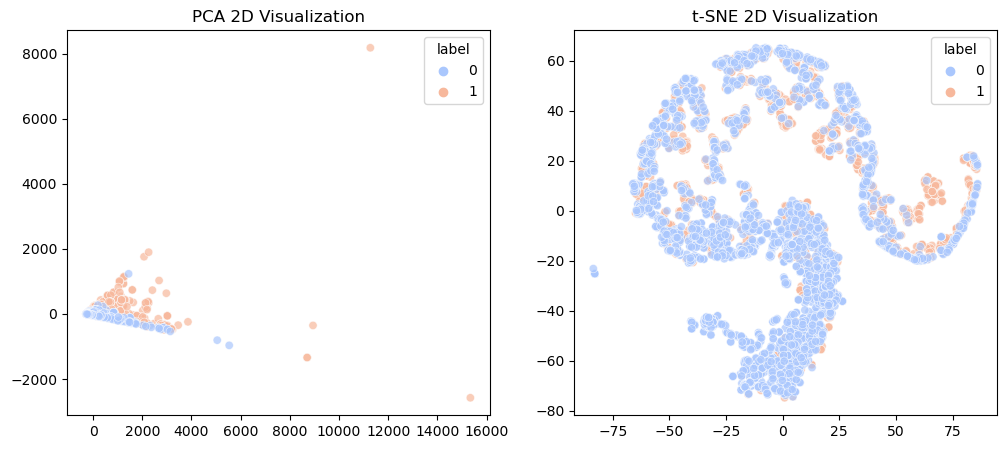

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data'
col_names = [f'feature_{i}' for i in range(57)] + ['label']
data = pd.read_csv(url, header=None, names=col_names)

# Step 2: Data preprocessing
print("Checking for missing values:")
print(data.isnull().sum())
X = data.iloc[:, :-1]
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train classifiers without PCA
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

print("Accuracy without PCA:")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name}: {accuracy_score(y_test, preds):.4f}")

# Step 4: PCA for dimensionality reduction
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("\nAccuracy with PCA:")
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    preds = model.predict(X_test_pca)
    print(f"{name}: {accuracy_score(y_test, preds):.4f}")

# Step 5: Visualization
X_pca_2d = PCA(n_components=2).fit_transform(X)
X_tsne_2d = TSNE(n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=X_pca_2d[:,0], y=X_pca_2d[:,1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("PCA 2D Visualization")

plt.subplot(1,2,2)
sns.scatterplot(x=X_tsne_2d[:,0], y=X_tsne_2d[:,1], hue=y, palette='coolwarm', alpha=0.7)
plt.title("t-SNE 2D Visualization")

plt.show()
